In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from torchsummary import summary

# Fake data

In [2]:
fakedata = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels = np.arange(10)>4
print(fakedata), print(" ")
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
 
[False False False False False  True  True  True  True  True]


In [3]:
tf_fakedata = TensorDataset(torch.Tensor(fakedata), torch.Tensor(fakelabels))
print(type(tf_fakedata))
print(tf_fakedata)
print(tf_fakedata.tensors)

<class 'torch.utils.data.dataset.TensorDataset'>
(tensor([[ 11.,  12.,  13.,  14.],
        [ 21.,  22.,  23.,  24.],
        [ 31.,  32.,  33.,  34.],
        [ 41.,  42.,  43.,  44.],
        [ 51.,  52.,  53.,  54.],
        [ 61.,  62.,  63.,  64.],
        [ 71.,  72.,  73.,  74.],
        [ 81.,  82.,  83.,  84.],
        [ 91.,  92.,  93.,  94.],
        [101., 102., 103., 104.]]), tensor([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]))


In [4]:
tf_fakedatalr = DataLoader(tf_fakedata, shuffle=True)
print(type(tf_fakedatalr))
print(tf_fakedatalr)

<class 'torch.utils.data.dataloader.DataLoader'>


In [5]:
for i, j in tf_fakedatalr:
    print(i,j)

tensor([[31., 32., 33., 34.]]) tensor([0.])
tensor([[101., 102., 103., 104.]]) tensor([1.])
tensor([[91., 92., 93., 94.]]) tensor([1.])
tensor([[21., 22., 23., 24.]]) tensor([0.])
tensor([[71., 72., 73., 74.]]) tensor([1.])
tensor([[11., 12., 13., 14.]]) tensor([0.])
tensor([[41., 42., 43., 44.]]) tensor([0.])
tensor([[51., 52., 53., 54.]]) tensor([0.])
tensor([[81., 82., 83., 84.]]) tensor([1.])
tensor([[61., 62., 63., 64.]]) tensor([1.])


# scikit-learn train test split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(fakedata, fakelabels, train_size=0.8)

train_data = TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train))
test_data = TensorDataset(torch.Tensor(x_test), torch.Tensor(y_test))

train_data = DataLoader(train_data, batch_size=4)
test_data = DataLoader(test_data)

In [7]:
# Previously the batch size is one, now it is four. It means each batch contains four data points
for i,j in train_data:
    print(i,j)

tensor([[21., 22., 23., 24.],
        [41., 42., 43., 44.],
        [61., 62., 63., 64.],
        [71., 72., 73., 74.]]) tensor([0., 0., 1., 1.])
tensor([[91., 92., 93., 94.],
        [11., 12., 13., 14.],
        [81., 82., 83., 84.],
        [51., 52., 53., 54.]]) tensor([1., 0., 1., 0.])


In [8]:
for i,j in test_data:
    print(i,j)

tensor([[31., 32., 33., 34.]]) tensor([0.])
tensor([[101., 102., 103., 104.]]) tensor([1.])


# Real data

In [2]:
import seaborn as sns
data = sns.load_dataset('iris')
df = torch.tensor(data.drop(columns="species").values).float()
labels = torch.zeros(len(df), dtype=torch.long)
labels[data.species == 'versicolor'] = 1 
labels[data.species == 'virginica'] = 2

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
x_train, x_test, y_train, y_test = train_test_split(df, labels, train_size=0.8)

train_data = TensorDataset(x_train, y_train)
test_data = TensorDataset(x_test, y_test)
print(f'Test data size: {test_data.tensors[0].shape[0]}')

train_loader = DataLoader(train_data, batch_size=12)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

Test data size: 30


In [5]:
for train_x, train_y in train_loader:
    print(train_x.shape, train_y.shape)

print('sample batch:')
print(train_x)
print(train_y)

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
sample batch:
tensor([[7.1000, 3.0000, 5.9000, 2.1000],
        [6.7000, 3.3000, 5.7000, 2.5000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [7.3000, 2.9000, 6.3000, 1.8000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [5.0000, 2.0000, 3.5000, 1.0000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [6.9000, 3.1000, 4.9000, 1.5000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [5.6000, 2.9000, 3.6000, 1.3000]])
tensor([2, 2, 0, 2, 0, 2, 1, 2, 1, 1, 2, 1])


In [6]:
for test_x, test_y in test_loader:
    print(test_x.shape, test_y.shape)

print('sample batch:')
print(test_x)
print(test_y)

torch.Size([30, 4]) torch.Size([30])
sample batch:
tensor([[6.7000, 2.5000, 5.8000, 1.8000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [4.8000, 3.4000, 1.9000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.0000, 3.4000, 1.6000, 0.4000],
        [5.1000, 3.8000, 1.6000, 0.2000],
        [4.9000, 3.6000, 1.4000, 0.1000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [6.7000, 3.0000, 5.0000, 1.7000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.9000, 2.4000, 3.3000, 1.0000],
        [6.0000, 2.2000, 5.0000, 1.5000],
        [5.5000, 2.5000, 4.0000, 1.3000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [5.0000, 3.3000, 1.4000, 0.2000],
        [5.5000, 2.4000, 3.8000, 1.1000],
        [5.2000, 3.4000, 1.4000, 0.2000],
        [6.2000, 2.8000, 4.8000, 1.8000],
        [5.0000, 3.0000, 1.6000, 0.2000],
        [5.8000, 2.7000, 4.1000, 1.0000],
        [4.6000, 3.1000, 

# Model

In [24]:
def model():
    ann = nn.Sequential(
        nn.Linear(4,4),
        nn.ReLU(),
        nn.Linear(4,4),
        nn.ReLU(),
        nn.Linear(4,3),
    )
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(ann.parameters(), lr=0.1)
    return ann, loss_function, optimizer

In [25]:
net, lossfn, opt = model()

In [26]:
summary(net, (150,4))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 150, 4]              20
              ReLU-2               [-1, 150, 4]               0
            Linear-3               [-1, 150, 4]              20
              ReLU-4               [-1, 150, 4]               0
            Linear-5               [-1, 150, 3]              15
Total params: 55
Trainable params: 55
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.00
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


In [27]:
epochs = 500
def trainTheModel():
  # initialize accuracies as empties (not storing losses here)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(epochs):
    # loop over training data batches
    batchAcc = []
    for X,y in train_loader:
      # forward pass and loss
      yHat = net(X)
      loss = lossfn(yHat,y)
      # backprop
      opt.zero_grad()
      loss.backward()
      opt.step()
      # compute training accuracy just for this batch
      batchAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
    # end of batch loop...
    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )
    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    predlabels = torch.argmax( net(X),axis=1 )
    testAcc.append( 100*torch.mean((predlabels == y).float()).item() )
  
  # function output
  return trainAcc,testAcc

In [28]:
print(next(iter(test_loader)))

[tensor([[6.7000, 2.5000, 5.8000, 1.8000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [4.8000, 3.4000, 1.9000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.0000, 3.4000, 1.6000, 0.4000],
        [5.1000, 3.8000, 1.6000, 0.2000],
        [4.9000, 3.6000, 1.4000, 0.1000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [6.7000, 3.0000, 5.0000, 1.7000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.9000, 2.4000, 3.3000, 1.0000],
        [6.0000, 2.2000, 5.0000, 1.5000],
        [5.5000, 2.5000, 4.0000, 1.3000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [5.0000, 3.3000, 1.4000, 0.2000],
        [5.5000, 2.4000, 3.8000, 1.1000],
        [5.2000, 3.4000, 1.4000, 0.2000],
        [6.2000, 2.8000, 4.8000, 1.8000],
        [5.0000, 3.0000, 1.6000, 0.2000],
        [5.8000, 2.7000, 4.1000, 1.0000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 2.3000, 3.3000, 

In [29]:
trainacc, testacc = trainTheModel()

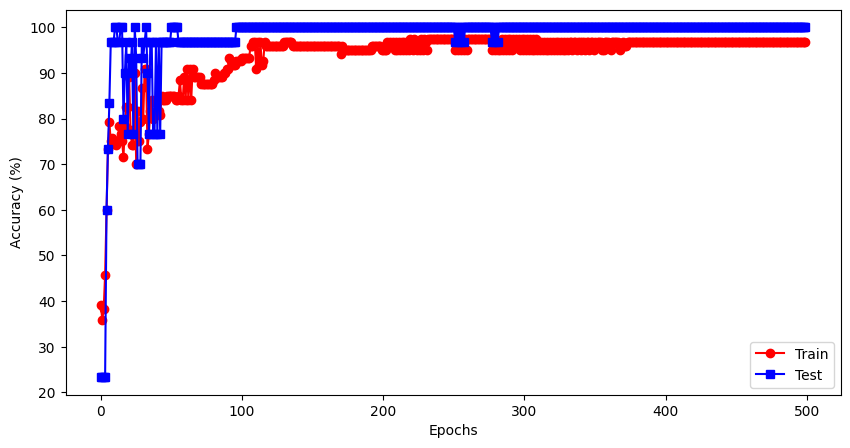

In [30]:
# plot the results
fig = plt.figure(figsize=(10,5))

plt.plot(trainacc,'ro-')
plt.plot(testacc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])
plt.show()